In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('./data/order.xlsx')
df

,Date,M3
0,2012-01-01,27
1,2012-02-01,37
2,2012-03-01,8
3,2012-04-01,9
4,2012-05-01,11
...,...,...
77,2018-06-01,310
78,2018-07-01,288
79,2018-08-01,190
80,2018-09-01,241


# 기본 데이터 확인


In [3]:
# 샘플도 적고 특징도 매우 적다
df.shape

(82, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    82 non-null     datetime64[ns]
 1   M3      82 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.4 KB


In [5]:
df.isnull().sum()

Date    0
M3      0
dtype: int64

In [6]:
df.describe()

,M3
count,82.000000
mean,82.134146
std,79.807138
min,2.000000
25%,26.250000
50%,53.500000
75%,131.000000
max,393.000000


# 발주 추이

In [7]:
df['Date'].min(), df['Date'].max() 

(Timestamp('2012-01-01 00:00:00'), Timestamp('2018-10-01 00:00:00'))

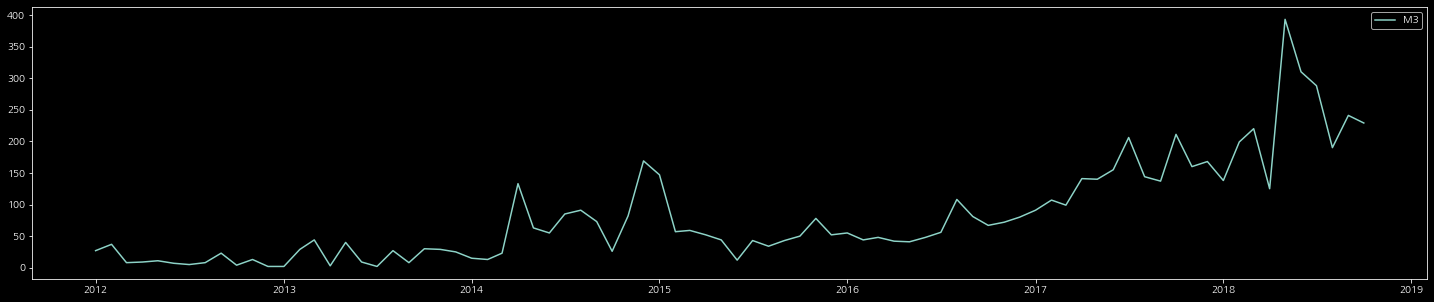

In [8]:
# 전체 기간 Plotting 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

plt.plot(df['Date'], df['M3'], label='M3');
plt.legend();
plt.gcf().set_size_inches(25, 5)

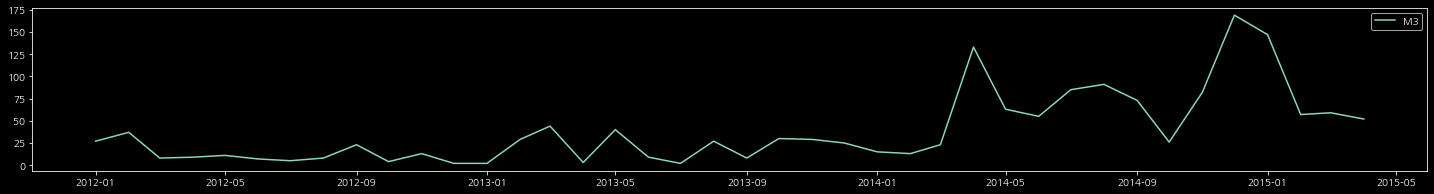

In [9]:
# 일부 기간 Plotting [0:40]
plt.plot(df['Date'][0:40], df['M3'][0:40], label='M3');
plt.legend();
plt.gcf().set_size_inches(25, 3)

In [10]:
# 월 별 비교
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df.head(5)

,Date,M3,year,month
0,2012-01-01,27,2012,1
1,2012-02-01,37,2012,2
2,2012-03-01,8,2012,3
3,2012-04-01,9,2012,4
4,2012-05-01,11,2012,5


In [11]:
# pivot table을 활용 년도벼 월별 자재 발주량 비교
df_pivot = pd.pivot_table(df,                  # 피벗할 데이터프레임
                      index = 'year',          # 행 위치에 들어갈 열
                      columns = 'month',       # 열 위치에 들어갈 열
                      values = 'M3')           # 데이터로 사용할 열 

df_pivot

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2012,27.0,37.0,8.0,9.0,11.0,7.0,5.0,8.0,23.0,4.0,13.0,2.0
2013,2.0,29.0,44.0,3.0,40.0,9.0,2.0,27.0,8.0,30.0,29.0,25.0
2014,15.0,13.0,23.0,133.0,63.0,55.0,85.0,91.0,73.0,26.0,82.0,169.0
2015,147.0,57.0,59.0,52.0,44.0,12.0,43.0,34.0,43.0,50.0,78.0,52.0
2016,55.0,44.0,48.0,42.0,41.0,48.0,56.0,108.0,81.0,67.0,72.0,80.0
2017,91.0,107.0,99.0,141.0,140.0,155.0,206.0,144.0,137.0,211.0,160.0,168.0
2018,138.0,199.0,220.0,125.0,393.0,310.0,288.0,190.0,241.0,229.0,NaN,NaN


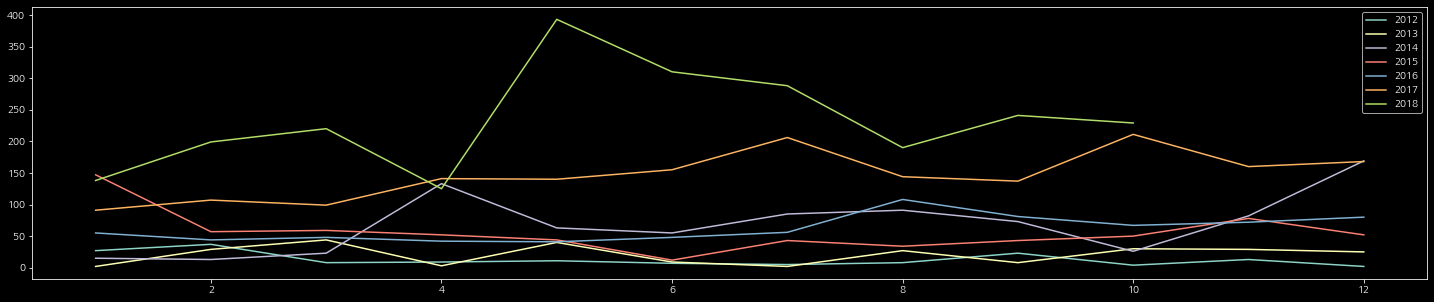

In [12]:
plt.plot(df_pivot.iloc[0,:], label='2012');
plt.plot(df_pivot.iloc[1,:], label='2013');
plt.plot(df_pivot.iloc[2,:], label='2014');
plt.plot(df_pivot.iloc[3,:], label='2015');
plt.plot(df_pivot.iloc[4,:], label='2016');
plt.plot(df_pivot.iloc[5,:], label='2017');
plt.plot(df_pivot.iloc[6,:], label='2018');
plt.legend();
plt.gcf().set_size_inches(25, 5)

# 시계열 탐색

In [13]:
df['Date'] = pd.to_datetime(df['Date'])

In [14]:
df=df.set_index('Date')

In [15]:
df.head()

,M3,year,month
Date,,,
2012-01-01,27,2012,1
2012-02-01,37,2012,2
2012-03-01,8,2012,3
2012-04-01,9,2012,4
2012-05-01,11,2012,5


In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

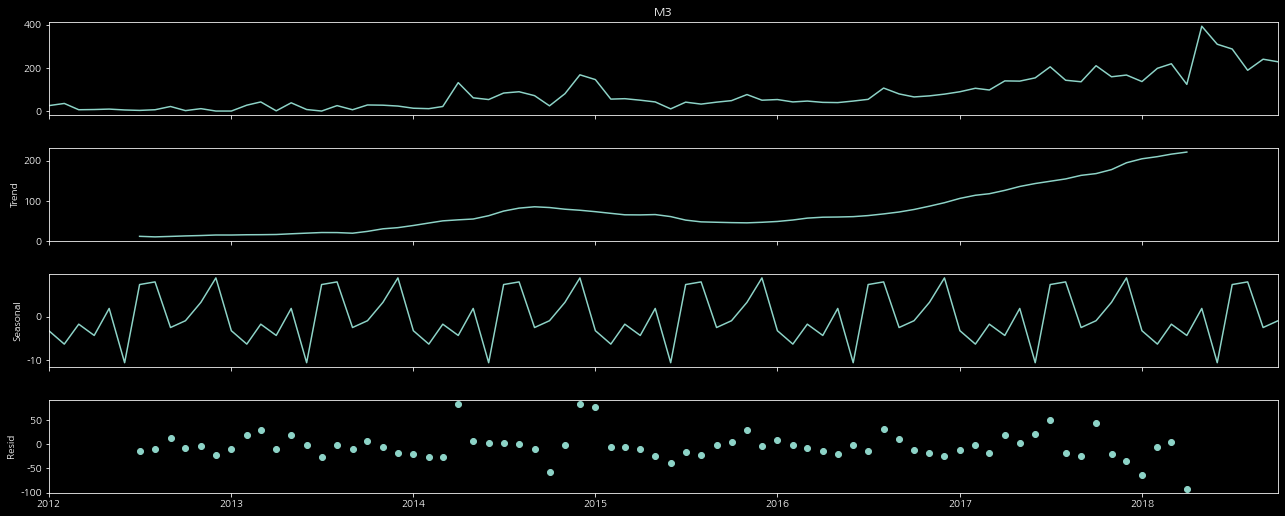

In [17]:
# 덧셈 분해 (additive decomposition) 
res = seasonal_decompose(df['M3'],model='addictive')
res.plot()
plt.gcf().set_size_inches(20, 8)
plt.show()

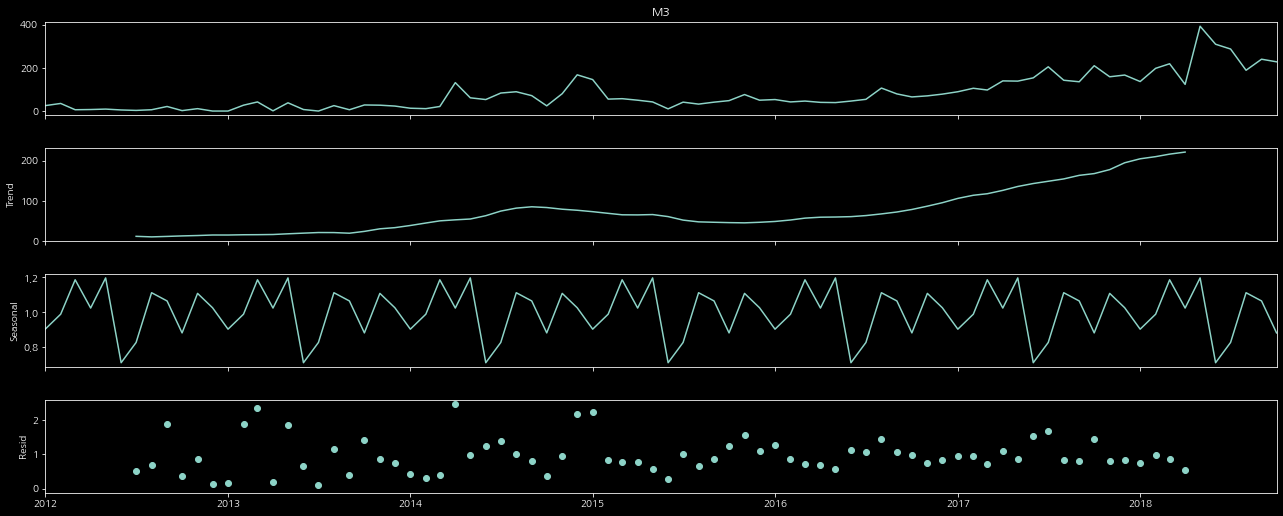

In [18]:
# 곱셈 분해 (multiplicative decomposition)
# 잔차 그래프를 보면 덧셈 분해보다 더 민감하게 변화하는 패턴을 확인할 수 있음
res = seasonal_decompose(df['M3'],model='multiplicative')
res.plot()
plt.gcf().set_size_inches(20, 8)
plt.show()

In [19]:
# attribute 활용 실제 데이터 값 조회 가능
res.observed

Date
2012-01-01     27.0
2012-02-01     37.0
2012-03-01      8.0
2012-04-01      9.0
2012-05-01     11.0
              ...  
2018-06-01    310.0
2018-07-01    288.0
2018-08-01    190.0
2018-09-01    241.0
2018-10-01    229.0
Name: M3, Length: 82, dtype: float64

In [20]:
# Trend를 표현하기 위해 앞, 뒤에 일부 데이터가 사라짐 (*약점)
res.trend

Date
2012-01-01   NaN
2012-02-01   NaN
2012-03-01   NaN
2012-04-01   NaN
2012-05-01   NaN
              ..
2018-06-01   NaN
2018-07-01   NaN
2018-08-01   NaN
2018-09-01   NaN
2018-10-01   NaN
Name: trend, Length: 82, dtype: float64

In [21]:
# 중간값은 채워져 있음 
res.trend[30:40]

Date
2014-07-01    74.500000
2014-08-01    81.833333
2014-09-01    85.166667
2014-10-01    83.291667
2014-11-01    79.125000
2014-12-01    76.541667
2015-01-01    73.000000
2015-02-01    68.875000
2015-03-01    65.250000
2015-04-01    65.000000
Name: trend, dtype: float64

In [22]:
# Seasonal 데이터 확인
res.seasonal

Date
2012-01-01    0.900295
2012-02-01    0.986397
2012-03-01    1.184340
2012-04-01    1.021823
2012-05-01    1.195039
                ...   
2018-06-01    0.707353
2018-07-01    0.823849
2018-08-01    1.109924
2018-09-01    1.062558
2018-10-01    0.878859
Name: seasonal, Length: 82, dtype: float64

In [23]:
# 잔차 데이터 확인
res.resid

Date
2012-01-01   NaN
2012-02-01   NaN
2012-03-01   NaN
2012-04-01   NaN
2012-05-01   NaN
              ..
2018-06-01   NaN
2018-07-01   NaN
2018-08-01   NaN
2018-09-01   NaN
2018-10-01   NaN
Name: resid, Length: 82, dtype: float64

# 모델링


In [24]:
import itertools
import statsmodels.api as sm

In [25]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq= [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [26]:
# 필요 없는 컬럼 사전 제거
df = df.drop(['year', 'month'], axis=1)
df.head()

,M3
Date,
2012-01-01,27
2012-02-01,37
2012-03-01,8
2012-04-01,9
2012-05-01,11


In [27]:
np.random.seed(1234)

cols = ['param','param_seasonal','aic']
lst = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df,
                                            order=param, 
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            lst.append([param, param_seasonal, results.aic])
            df1 = pd.DataFrame(lst, columns=cols)
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1000.3292122770475


c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: 

ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:831.2496601807491
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:789.7866810047587
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:664.4255818666195
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:792.2054815357808


c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: 

ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:771.4112962840667
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:675.0642816555652
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:666.4239232273673
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:929.455669469729
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:782.9348700017323
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:760.5470077862789


c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: 

ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:638.0698480454455
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:780.9654398905632


c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:752.4203579971766
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:658.8043952235881


c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:639.5737300620185
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:845.9343856515544
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:730.531050470377
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:759.6204064806966


c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: 

ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:622.6375197824736
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:740.4080970394318
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:732.3493819004036


c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: 

ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:635.6264756339671
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:624.6113086089263
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:817.0593090413845
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:705.7996443788547


c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: 

ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:728.9146994844801
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:599.1471408502117


c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:725.2141344623211
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:707.789226498977


c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:623.66411751565


c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:601.146113436463
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:855.7035351314848
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:741.5985269863453


c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: 

ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:757.5034884757445
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:629.9768323079616
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:741.4967392205745


c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: 

ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:743.484010717276
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:630.8131093859404


c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:632.6236402759037
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:826.612889947728
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:715.2537031644907


c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: 

ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:740.4326417681381
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:610.9648961700575


c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:725.0556425924123
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:717.2532729878791


c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:625.2262173349534


c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:612.9626479896374
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:834.9725778375957
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:722.2978087426774
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:749.8231306540565


c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: 

ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:616.5272405110936
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:722.2763788944033


c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:724.2678027306191
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:619.6590747736002


c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:618.5177282891482
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:818.7494161421628
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:707.6097447492898


c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: 

ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:730.6354254950286
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:600.4012879907079


c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:717.1339845392947
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:709.6009253675979


c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:614.5394409451076


c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:602.3988974866089


In [28]:
df1

,param,param_seasonal,aic
0,"(0, 0, 0)","(0, 0, 0, 12)",1000.329212
1,"(0, 0, 0)","(0, 0, 1, 12)",831.249660
2,"(0, 0, 0)","(0, 1, 0, 12)",789.786681
3,"(0, 0, 0)","(0, 1, 1, 12)",664.425582
4,"(0, 0, 0)","(1, 0, 0, 12)",792.205482
...,...,...,...
59,"(1, 1, 1)","(0, 1, 1, 12)",600.401288
60,"(1, 1, 1)","(1, 0, 0, 12)",717.133985
61,"(1, 1, 1)","(1, 0, 1, 12)",709.600925
62,"(1, 1, 1)","(1, 1, 0, 12)",614.539441


In [29]:
# AIC가 최소가 되는 parameter 조합 
aic_min=df1['aic'].min()
optimal_para=df1.loc[df1['aic']==aic_min]
optimal_para

,param,param_seasonal,aic
27,"(0, 1, 1)","(0, 1, 1, 12)",599.147141


In [30]:
# Best score 기준 모델 학습
mod = sm.tsa.statespace.SARIMAX(df,
                                order=(0,1,1),
                                seasonal_order=(0,1,1,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6590      0.116     -5.692      0.000      -0.886      -0.432
ma.S.L12      -0.7417      0.367     -2.023      0.043      -1.460      -0.023
sigma2      2630.1017    310.260      8.477      0.000    2022.003    3238.201


c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [31]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                 M3   No. Observations:                   82
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -296.574
Date:                            Wed, 03 Jan 2024   AIC                            599.147
Time:                                    23:43:40   BIC                            605.169
Sample:                                01-01-2012   HQIC                           601.476
                                     - 10-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6590      0.116     -5.692      0.000      -0.886      -0.432
ma.S.L12      -0.7417      0.367     -2.023      0.043      -1.460      -0.023
sigma2      2630.1017    310.260      8.477      0.000    2022.003    3238.201
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):                52.36
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               2.09   Skew:                             1.28
Prob(H) (two-sided):                  0.13   Kurtosis:                         7.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

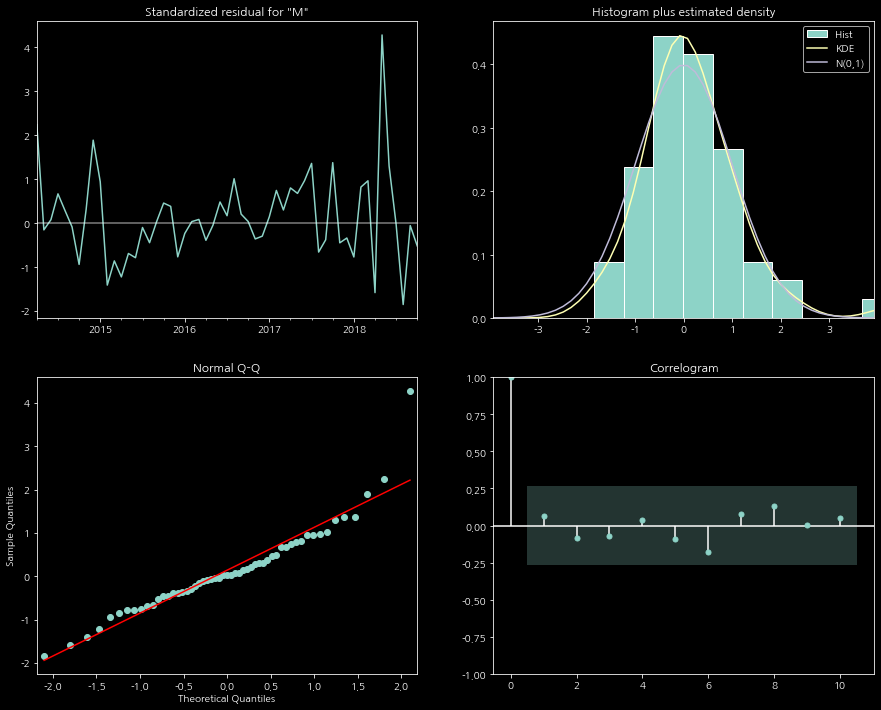

In [32]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

# test


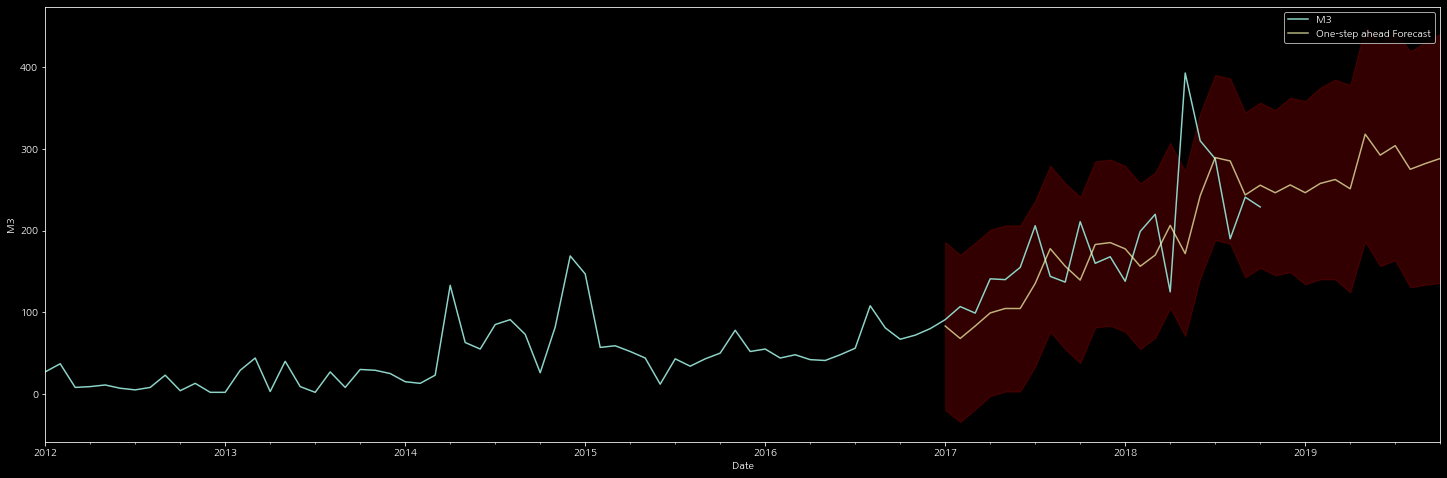

In [34]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), end=pd.to_datetime('2019-10-01'), dynamic=False)

pred_ci = pred.conf_int()
# 그래프를 2015년 부터 그리겠다.
ax = df['2012':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='red', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('M3')
plt.legend()

plt.gcf().set_size_inches(25, 8)
plt.show()

In [35]:
df.index.max()

Timestamp('2018-10-01 00:00:00')

In [36]:
y_forecasted = pred.predicted_mean

# 예측 시작날짜
y_truth = df['2017-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth['M3']) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

mae = (abs(y_forecasted - y_truth['M3'])).mean()
print('The MAE is {}'.format(round(mae, 2)))

The Mean Squared Error of our forecasts is 4345.03
The MAE is 47.93


In [37]:
cols = ['y_truth','y_forecasted']
dat = []
result=pd.DataFrame(dat,columns=cols)

# 예측 시작날짜를 입력
y_real=df['2017-01-01':]

result['y_forecasted']=y_forecasted
result['y_truth']=y_real['M3']
result['diff'] = result['y_truth'] - result['y_forecasted']
result

,y_truth,y_forecasted,diff
2017-01-01,91.0,83.175757,7.824243
2017-02-01,107.0,67.938830,39.061170
2017-03-01,99.0,83.200814,15.799186
2017-04-01,141.0,99.200742,41.799258
2017-05-01,140.0,104.656336,35.343664
2017-06-01,155.0,104.631222,50.368778
2017-07-01,206.0,135.285839,70.714161
2017-08-01,144.0,177.907443,-33.907443
2017-09-01,137.0,156.424170,-19.424170
2017-10-01,211.0,139.425423,71.574577
